In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kagglexfellowship/kagglex-cohort4/sample_submission.csv
/kaggle/input/kagglexfellowship/kagglex-cohort4/train.csv
/kaggle/input/kagglexfellowship/kagglex-cohort4/test.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
train = pd.read_csv('/kaggle/input/kagglexfellowship/kagglex-cohort4/train.csv')
pd.DataFrame(train)

id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                                             engine  \
0           Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2           Gasoline       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3             Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4           Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
...              ...                                                ...   
54268       Gasoline       445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   
54269  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
54270       Gasoline      420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
54271       Gasoline                               4.0L H6 24V GDI DOHC   
54272         Hybrid  261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...   

                            transmission ext_col int_col  \
0                           10-Speed A/T    Blue    Gray   
1                            6-Speed M/T   Black   Black   
2                            6-Speed A/T  Purple   Beige   
3         Transmission w/Dual Shift Mode    Gray   Brown   
4                                    A/T   White   Black   
...                                  ...     ...     ...   
54268                        8-Speed A/T   White   Brown   
54269                        6-Speed A/T   Black   Black   
54270     Transmission w/Dual Shift Mode   White   Black   
54271  8-Speed Automatic with Auto-Shift   Beige   Brown   
54272                        8-Speed A/T   Black   Black   

                                     accident clean_title   price  
0                               None reported         Yes   11000  
1                               None reported         Yes    8250  
2                               None reported         Yes   15000  
3                               None reported         Yes   63500  
4                               None reported         Yes    7850  
...                                       ...         ...     ...  
54268                           None reported         Yes   29000  
54269  At least 1 accident or damage reported         Yes    6500  
54270  At least 1 accident or damage reported         Yes   18950  
54271                           None reported         Yes  194965  
54272                           None reported         Yes   37499  

[54273 rows x 13 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
train.describe()

id    model_year         milage         price
count  54273.000000  54273.000000   54273.000000  5.427300e+04
mean   27136.000000   2015.091979   72746.175667  3.921844e+04
std    15667.409917      5.588909   50469.490448  7.282634e+04
min        0.000000   1974.000000     100.000000  2.000000e+03
25%    13568.000000   2012.000000   32268.000000  1.550000e+04
50%    27136.000000   2016.000000   66107.000000  2.800000e+04
75%    40704.000000   2019.000000  102000.000000  4.500000e+04
max    54272.000000   2024.000000  405000.000000  2.954083e+06

In [7]:
sample = pd.read_csv('/kaggle/input/kagglexfellowship/kagglex-cohort4/sample_submission.csv')
pd.DataFrame(sample)

id      price
0      54273  39218.443
1      54274  39218.443
2      54275  39218.443
3      54276  39218.443
4      54277  39218.443
...      ...        ...
36178  90451  39218.443
36179  90452  39218.443
36180  90453  39218.443
36181  90454  39218.443
36182  90455  39218.443

[36183 rows x 2 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


Create a plot of model_year vs price

<function matplotlib.pyplot.show(close=None, block=None)>

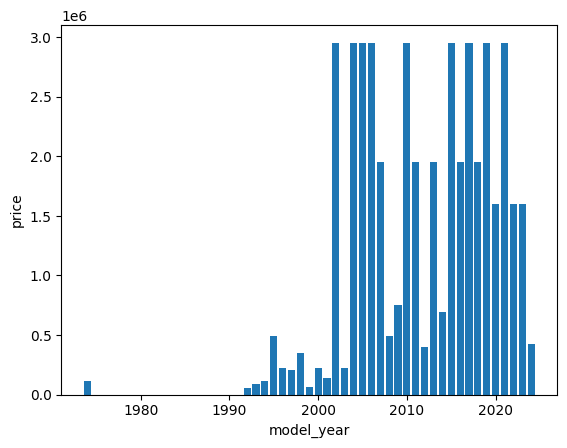

In [9]:
x = train['model_year']
y = train['price']

plt.bar(train['model_year'], train['price'])
plt.xlabel('model_year')
plt.ylabel('price')

plt.show

<Axes: ylabel='model_year'>

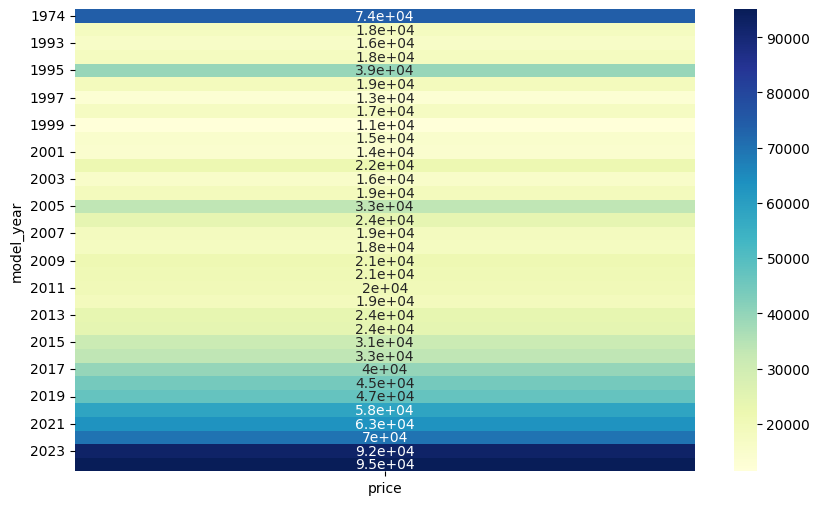

In [10]:
pivot_table = train.pivot_table(index='model_year', values='price')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu')

<function matplotlib.pyplot.show(close=None, block=None)>

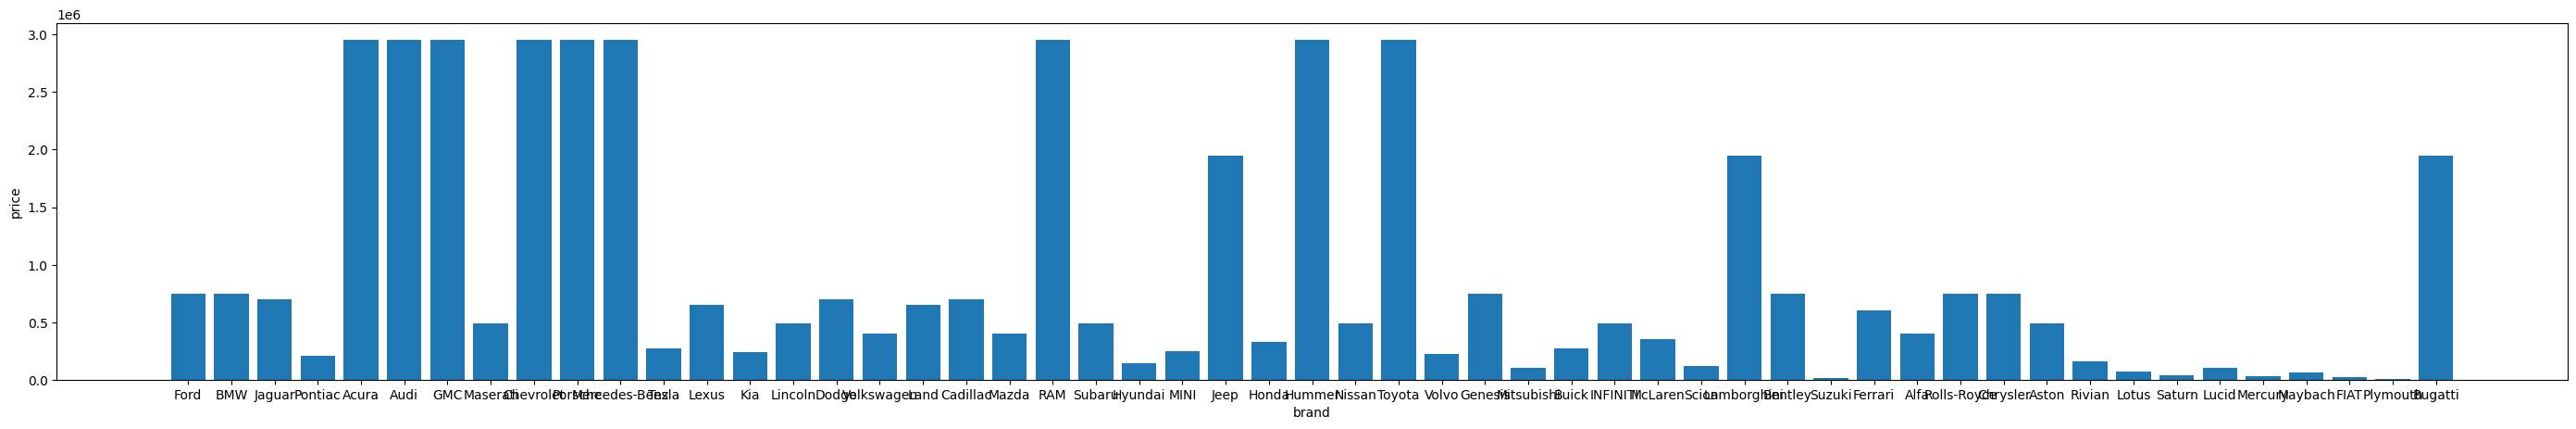

In [11]:
x = train['brand']
y = train['price']
plt.figure(figsize = (35,5))
plt.bar(train['brand'], train['price'])
plt.xlabel('brand')
plt.ylabel('price')
plt.show

<Axes: ylabel='brand'>

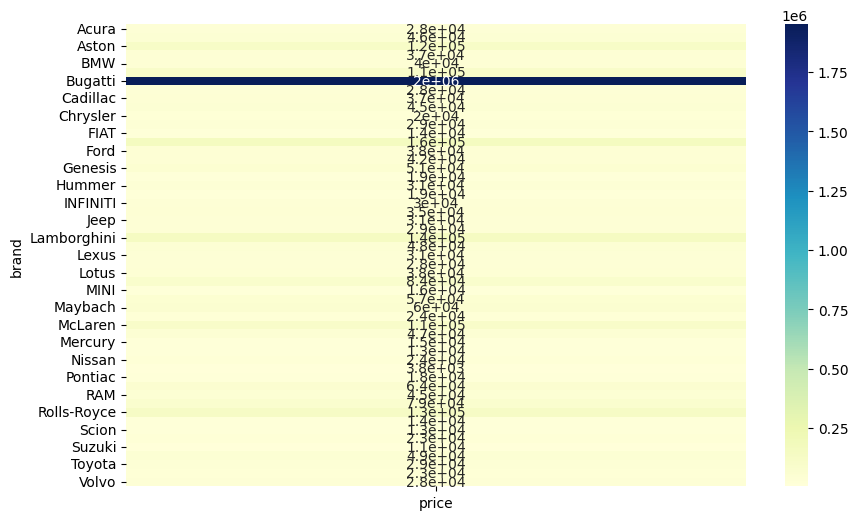

In [12]:
pivot_table = train.pivot_table(index='brand', values='price')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu')

<function matplotlib.pyplot.show(close=None, block=None)>

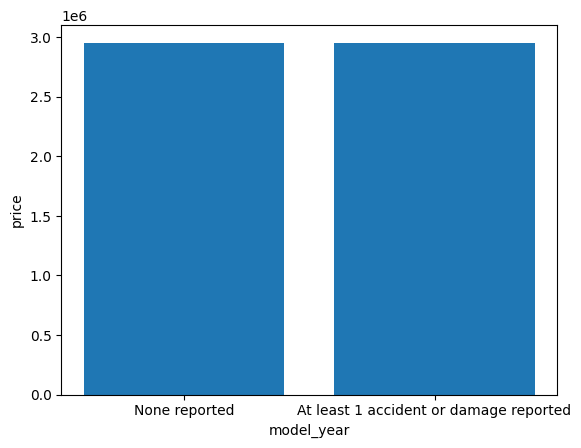

In [13]:
x = train['accident']
y = train['price']

plt.bar(train['accident'], train['price'])
plt.xlabel('model_year')
plt.ylabel('price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

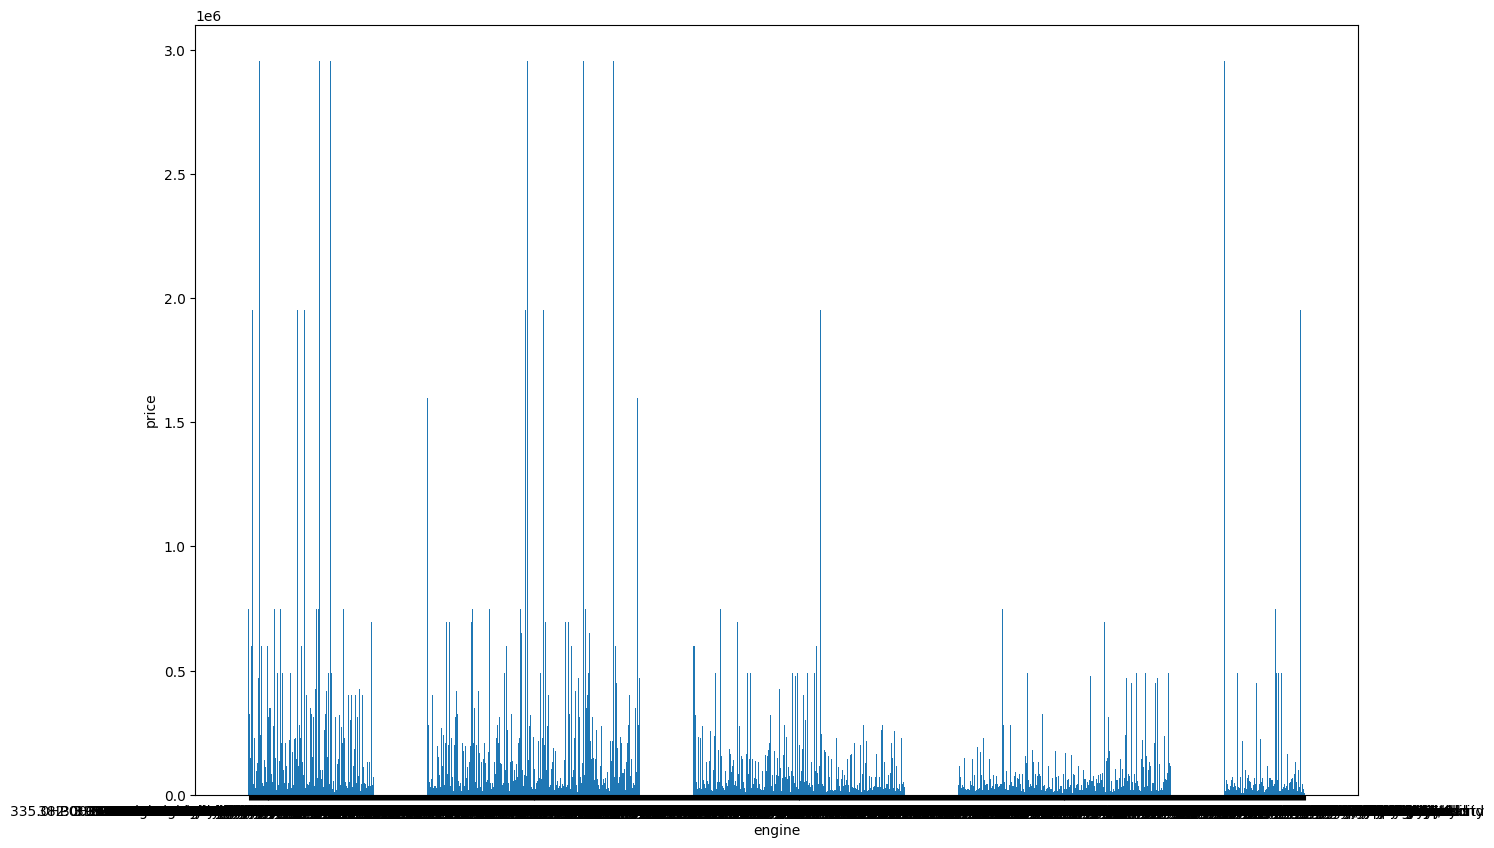

In [14]:
x = train['engine']
y = train['price']
plt.figure(figsize = (15,10))
plt.bar(train['engine'], train['price'])
plt.xlabel('engine')
plt.ylabel('price')
plt.show

In [15]:
train['title status'] = train['clean_title'].apply(lambda x:1 if x =='Yes' else 0)
print(train['title status'])

0        1
1        1
2        1
3        1
4        1
        ..
54268    1
54269    1
54270    1
54271    1
54272    1
Name: title status, Length: 54273, dtype: int64


In [16]:

pd.DataFrame(train)

id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                                             engine  \
0           Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2           Gasoline       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3             Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4           Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
...              ...                                                ...   
54268       Gasoline       445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   
54269  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
54270       Gasoline      420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
54271       Gasoline                               4.0L H6 24V GDI DOHC   
54272         Hybrid  261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...   

                            transmission ext_col int_col  \
0                           10-Speed A/T    Blue    Gray   
1                            6-Speed M/T   Black   Black   
2                            6-Speed A/T  Purple   Beige   
3         Transmission w/Dual Shift Mode    Gray   Brown   
4                                    A/T   White   Black   
...                                  ...     ...     ...   
54268                        8-Speed A/T   White   Brown   
54269                        6-Speed A/T   Black   Black   
54270     Transmission w/Dual Shift Mode   White   Black   
54271  8-Speed Automatic with Auto-Shift   Beige   Brown   
54272                        8-Speed A/T   Black   Black   

                                     accident clean_title   price  \
0                               None reported         Yes   11000   
1                               None reported         Yes    8250   
2                               None reported         Yes   15000   
3                               None reported         Yes   63500   
4                               None reported         Yes    7850   
...                                       ...         ...     ...   
54268                           None reported         Yes   29000   
54269  At least 1 accident or damage reported         Yes    6500   
54270  At least 1 accident or damage reported         Yes   18950   
54271                           None reported         Yes  194965   
54272                           None reported         Yes   37499   

       title status  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
54268             1  
54269             1  
54270             1  
54271             1  
54272             1  

[54273 rows x 14 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

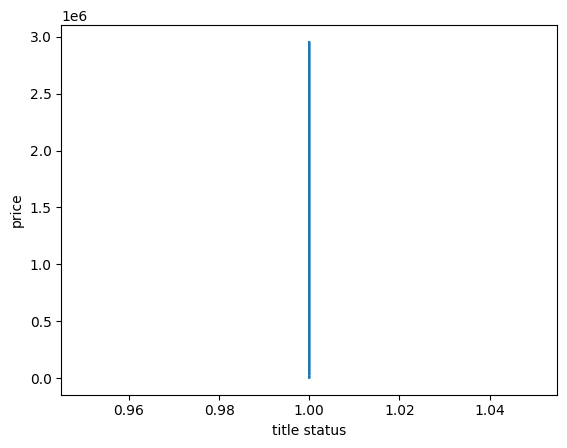

In [17]:
x = train['title status']
y = train['price']

plt.plot(train['title status'], train['price'])
plt.xlabel('title status')
plt.ylabel('price')
plt.show

In [18]:
train['Age'] = 2024 - train['model_year']
pd.DataFrame(train['Age'])

Age
0        6
1       17
2       15
3        2
4       23
...    ...
54268    7
54269    9
54270   11
54271    1
54272    3

[54273 rows x 1 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

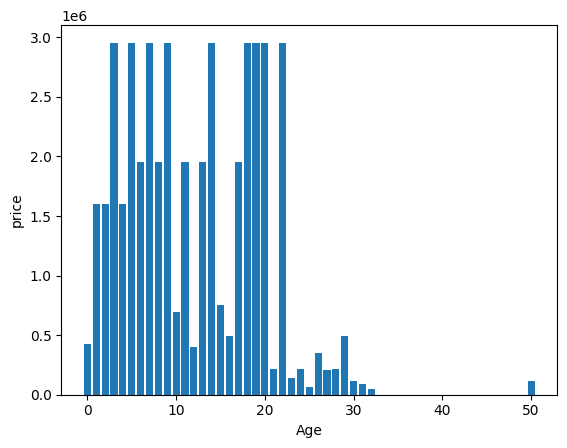

In [19]:
x = train['Age']
y = train['price']

plt.bar(train['Age'], train['price'])
plt.xlabel('Age')
plt.ylabel('price')

plt.show

In [20]:
train['brand_model'] = train['brand'] + " " + train['model']
pd.DataFrame(train['brand_model'])

brand_model
0                          Ford F-150 Lariat
1                                  BMW 335 i
2                           Jaguar XF Luxury
3                           BMW X7 xDrive40i
4                      Pontiac Firebird Base
...                                      ...
54268                       BMW X6 xDrive50i
54269                   Audi A4 2.0T Premium
54270                      Porsche Cayenne S
54271              Porsche 911 Carrera 4 GTS
54272  Audi A5 Sportback S line Premium Plus

[54273 rows x 1 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

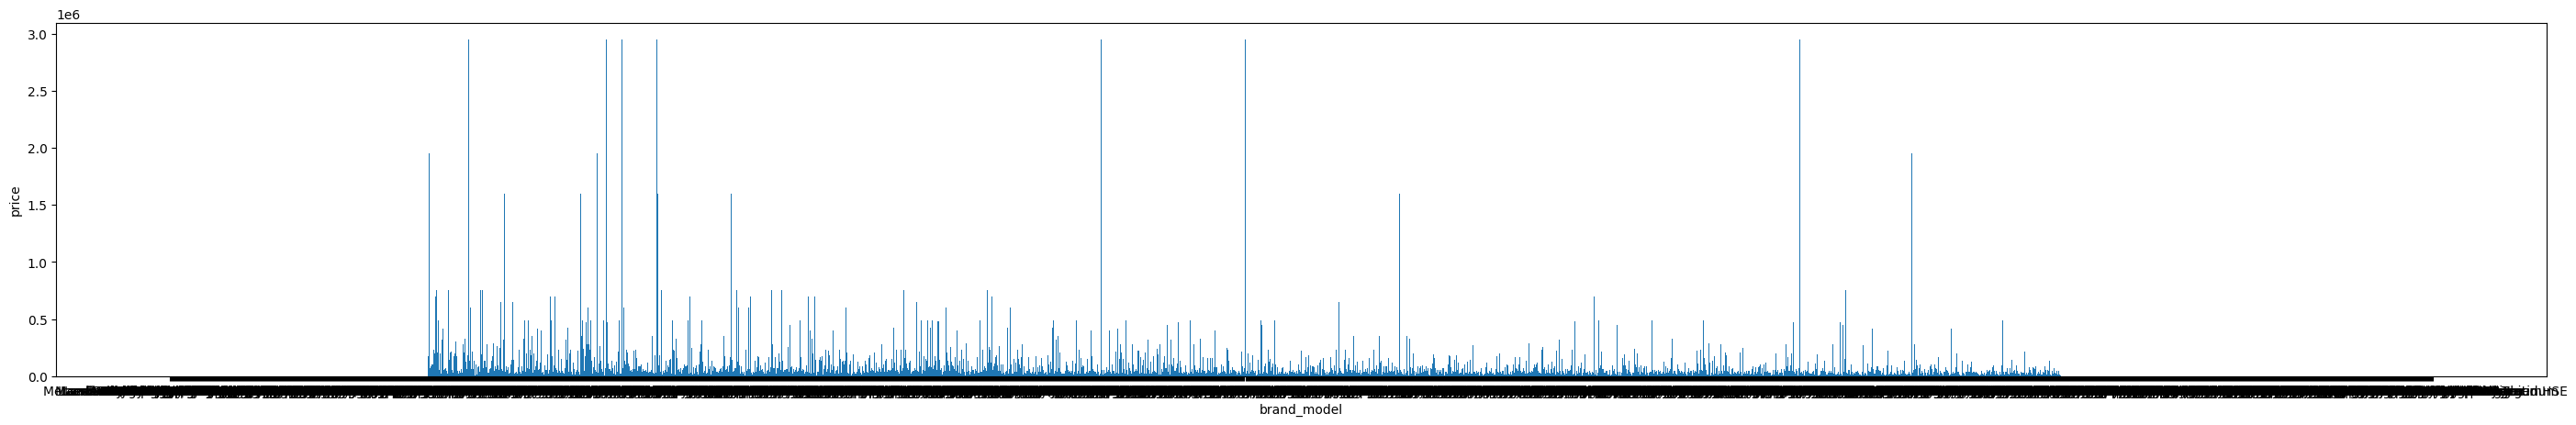

In [21]:
x = train['brand_model']
y = train['price']
plt.figure(figsize = (35,5))
plt.bar(train['brand_model'], train['price'])
plt.xlabel('brand_model')
plt.ylabel('price')
plt.show

In [22]:
from sklearn.preprocessing import MinMaxScaler

train['engine_numeric'] = train['engine'].str.extract('(\d+\.\d+)').astype(float)
scaler = MinMaxScaler()
train['engine_normalized'] = scaler.fit_transform(train[['engine_numeric']])
pd.DataFrame(train)

id    brand                             model  model_year  milage  \
0          0     Ford                      F-150 Lariat        2018   74349   
1          1      BMW                             335 i        2007   80000   
2          2   Jaguar                         XF Luxury        2009   91491   
3          3      BMW                      X7 xDrive40i        2022    2437   
4          4  Pontiac                     Firebird Base        2001  111000   
...      ...      ...                               ...         ...     ...   
54268  54268      BMW                      X6 xDrive50i        2017   29000   
54269  54269     Audi                   A4 2.0T Premium        2015   94634   
54270  54270  Porsche                         Cayenne S        2013   40989   
54271  54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272  54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                                             engine  \
0           Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2           Gasoline       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3             Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4           Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
...              ...                                                ...   
54268       Gasoline       445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   
54269  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
54270       Gasoline      420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
54271       Gasoline                               4.0L H6 24V GDI DOHC   
54272         Hybrid  261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...   

                            transmission ext_col int_col  \
0                           10-Speed A/T    Blue    Gray   
1                            6-Speed M/T   Black   Black   
2                            6-Speed A/T  Purple   Beige   
3         Transmission w/Dual Shift Mode    Gray   Brown   
4                                    A/T   White   Black   
...                                  ...     ...     ...   
54268                        8-Speed A/T   White   Brown   
54269                        6-Speed A/T   Black   Black   
54270     Transmission w/Dual Shift Mode   White   Black   
54271  8-Speed Automatic with Auto-Shift   Beige   Brown   
54272                        8-Speed A/T   Black   Black   

                                     accident clean_title   price  \
0                               None reported         Yes   11000   
1                               None reported         Yes    8250   
2                               None reported         Yes   15000   
3                               None reported         Yes   63500   
4                               None reported         Yes    7850   
...                                       ...         ...     ...   
54268                           None reported         Yes   29000   
54269  At least 1 accident or damage reported         Yes    6500   
54270  At least 1 accident or damage reported         Yes   18950   
54271                           None reported         Yes  194965   
54272                           None reported         Yes   37499   

       title status  Age                            brand_model  \
0                 1    6                      Ford F-150 Lariat   
1                 1   17                              BMW 335 i   
2                 1   15                       Jaguar XF Luxury   
3                 1    2                       BMW X7 xDrive40i   
4                 1   23                  Pontiac Firebird Base   
...             ...  ...                                    ...   
54268             1    7                       BMW X6 xDrive50i   
54269             1    9                   Audi A4 2.0T Premium   
54270  

<function matplotlib.pyplot.show(close=None, block=None)>

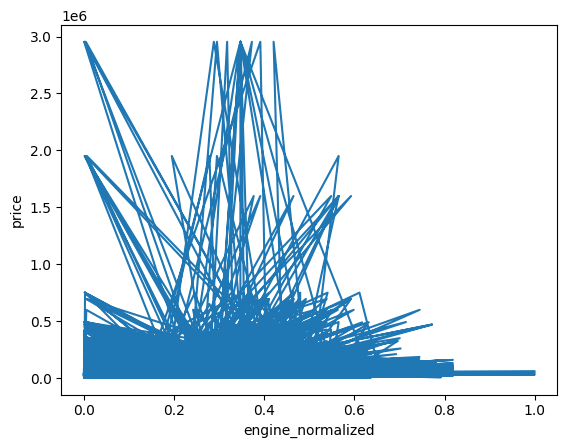

In [23]:
x = train['engine_normalized']
y = train['price']

plt.plot(train['engine_normalized'], train['price'])
plt.xlabel('engine_normalized')
plt.ylabel('price')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

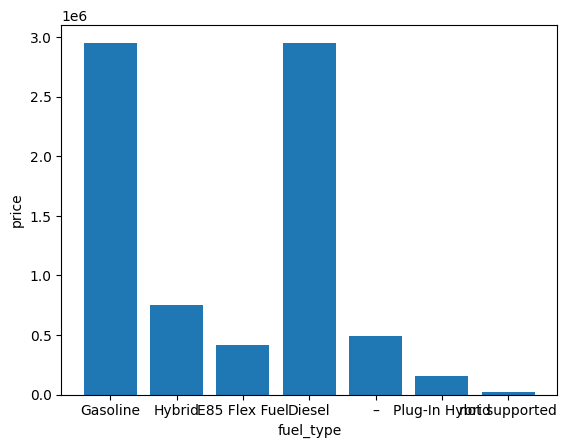

In [24]:
x = train['fuel_type']
y = train['price']

plt.bar(train['fuel_type'], train['price'])
plt.xlabel('fuel_type')
plt.ylabel('price')

plt.show

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
df_train = pd.DataFrame(train)
numerical_values = df_train.select_dtypes(include=['int', 'float'])
print(numerical_values)

          id  model_year  milage   price  title status  Age  engine_numeric  \
0          0        2018   74349   11000             1    6           375.0   
1          1        2007   80000    8250             1   17           300.0   
2          2        2009   91491   15000             1   15           300.0   
3          3        2022    2437   63500             1    2           335.0   
4          4        2001  111000    7850             1   23           200.0   
...      ...         ...     ...     ...           ...  ...             ...   
54268  54268        2017   29000   29000             1    7           445.0   
54269  54269        2015   94634    6500             1    9           220.0   
54270  54270        2013   40989   18950             1   11           420.0   
54271  54271        2023    1518  194965             1    1             4.0   
54272  54272        2021   35000   37499             1    3           261.0   

       engine_normalized  
0               0.366902

In [27]:
import category_encoders as ce
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
binary_cols = []
one_hot_cols = []
binary_encoder_cols = []

for col in categorical_cols:
    unique_values = df_train[col].nunique()
    if unique_values == 2:
        binary_cols.append(col)
    elif unique_values < 10:  
        one_hot_cols.append(col)
    else:
        binary_encoder_cols.append(col)
for col in binary_cols:
    
    df_train[col] = df_train[col].apply(lambda x: 0 if x in ['None reported', 'No'] else 1)

df_train = pd.get_dummies(df_train, columns=one_hot_cols, drop_first=True)
encoder = ce.BinaryEncoder(cols=binary_encoder_cols)
df_train = encoder.fit_transform(df_train)

print(df_train)





          id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0          0        0        0        0        0        0        1        0   
1          1        0        0        0        0        1        0        0   
2          2        0        0        0        0        1        1        0   
3          3        0        0        0        0        1        0        0   
4          4        0        0        0        1        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54268  54268        0        0        0        0        1        0        0   
54269  54269        0        0        0        1        1        0        0   
54270  54270        0        0        1        0        1        0        0   
54271  54271        0        0        1        0        1        0        0   
54272  54272        0        0        0        1        1        0        1   

       model_1  model_2  ...  brand_model_10  brand

In [28]:
corr_matrix = df_train.corr()
print(corr_matrix)
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

                                id   brand_0   brand_1   brand_2   brand_3  \
id                        1.000000 -0.000783  0.000514  0.001994  0.001207   
brand_0                  -0.000783  1.000000 -0.140221 -0.075082 -0.037448   
brand_1                   0.000514 -0.140221  1.000000  0.033357  0.224732   
brand_2                   0.001994 -0.075082  0.033357  1.000000  0.052457   
brand_3                   0.001207 -0.037448  0.224732  0.052457  1.000000   
...                            ...       ...       ...       ...       ...   
fuel_type_Gasoline       -0.002584  0.041383  0.010365  0.079337 -0.008877   
fuel_type_Hybrid          0.004816 -0.029960  0.030973 -0.037717  0.071875   
fuel_type_Plug-In Hybrid  0.005277 -0.011789  0.004271  0.007479  0.011766   
fuel_type_not supported  -0.008856 -0.001962  0.013238  0.009447  0.013039   
fuel_type_–              -0.000873  0.009716  0.045066 -0.001502 -0.005966   

                           brand_4   brand_5   model_0   model_

In [29]:
high_corr_pairs = []

for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j]))

print("Highly correlated feature pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]}")

correlation_with_target = corr_matrix['price'].drop('price')
high_correlation_with_target = correlation_with_target[abs(correlation_with_target) > 0.5]

print("\nFeatures highly correlated with the target variable 'price' (|correlation| > 0.5):")
print(high_correlation_with_target)



Highly correlated feature pairs (|correlation| > 0.8):
model_0 and brand_model_1: 0.923917627717394
model_1 and brand_model_2: 0.9101821049591957
model_2 and brand_model_3: 0.8697369713219998
model_3 and brand_model_4: 0.8177847366685732
model_year and Age: -1.0
engine_numeric and engine_normalized: 1.0000000000000007

Features highly correlated with the target variable 'price' (|correlation| > 0.5):
Series([], Name: price, dtype: float64)


In [30]:
from sklearn.metrics import get_scorer_names
print(get_scorer_names())


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [31]:
print(df_train.isnull())

          id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0      False    False    False    False    False    False    False    False   
1      False    False    False    False    False    False    False    False   
2      False    False    False    False    False    False    False    False   
3      False    False    False    False    False    False    False    False   
4      False    False    False    False    False    False    False    False   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54268  False    False    False    False    False    False    False    False   
54269  False    False    False    False    False    False    False    False   
54270  False    False    False    False    False    False    False    False   
54271  False    False    False    False    False    False    False    False   
54272  False    False    False    False    False    False    False    False   

       model_1  model_2  ...  brand_model_10  brand

In [32]:

print(df_train.isnull().sum())

id                          0
brand_0                     0
brand_1                     0
brand_2                     0
brand_3                     0
                           ..
fuel_type_Gasoline          0
fuel_type_Hybrid            0
fuel_type_Plug-In Hybrid    0
fuel_type_not supported     0
fuel_type_–                 0
Length: 77, dtype: int64


In [33]:
print(df_train)

          id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0          0        0        0        0        0        0        1        0   
1          1        0        0        0        0        1        0        0   
2          2        0        0        0        0        1        1        0   
3          3        0        0        0        0        1        0        0   
4          4        0        0        0        1        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54268  54268        0        0        0        0        1        0        0   
54269  54269        0        0        0        1        1        0        0   
54270  54270        0        0        1        0        1        0        0   
54271  54271        0        0        1        0        1        0        0   
54272  54272        0        0        0        1        1        0        1   

       model_1  model_2  ...  brand_model_10  brand

In [34]:
pd.DataFrame(df_train)

id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0          0        0        0        0        0        0        1        0   
1          1        0        0        0        0        1        0        0   
2          2        0        0        0        0        1        1        0   
3          3        0        0        0        0        1        0        0   
4          4        0        0        0        1        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54268  54268        0        0        0        0        1        0        0   
54269  54269        0        0        0        1        1        0        0   
54270  54270        0        0        1        0        1        0        0   
54271  54271        0        0        1        0        1        0        0   
54272  54272        0        0        0        1        1        0        1   

       model_1  model_2  ...  brand_model_10  brand_model_11  engine_numeric  \
0            0        0  ...               0               1           375.0   
1            0        0  ...               1               0           300.0   
2            0        0  ...               1               1           300.0   
3            0        0  ...               0               0           335.0   
4            0        0  ...               0               1           200.0   
...        ...      ...  ...             ...             ...             ...   
54268        0        1  ...               1               0           445.0   
54269        0        0  ...               0               0           220.0   
54270        0        0  ...               0               1           420.0   
54271        1        0  ...               0               0             4.0   
54272        1        1  ...               0               0           261.0   

       engine_normalized  fuel_type_E85 Flex Fuel  fuel_type_Gasoline  \
0               0.366902                    False                True   
1               0.293286                    False                True   
2               0.293286                    False                True   
3               0.327640                    False               False   
4               0.195132                    False                True   
...                  ...                      ...                 ...   
54268           0.435611                    False                True   
54269           0.214762                     True               False   
54270           0.411072                    False                True   
54271           0.002748                    False                True   
54272           0.255006                    False               False   

       fuel_type_Hybrid  fuel_type_Plug-In Hybrid  fuel_type_not supported  \
0                 False                     False                    False   
1                 False                     False                    False   
2                 False                     False                    False   
3                  True                     False                    False   
4                 False                     False                    False   
...                 ...                       ...                      ...   
54268             False                     False                    False   
54269             False                     False                    False   
54270             False                     False                    False   
54271             False                     False                    False   
54272              True                     False                    False   

       fuel_type_–  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
54268        False  
54269        False  
54270        False  
54271        False  
54272        False  

[54273 rows x 77 columns]

In [35]:
print(train.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'title status', 'Age', 'brand_model', 'engine_numeric',
       'engine_normalized'],
      dtype='object')


In [36]:
boolean_columns = df_train.select_dtypes(include=['bool']).columns
df_train[boolean_columns] = df_train[boolean_columns].astype(int)
pd.DataFrame(df_train)



id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0          0        0        0        0        0        0        1        0   
1          1        0        0        0        0        1        0        0   
2          2        0        0        0        0        1        1        0   
3          3        0        0        0        0        1        0        0   
4          4        0        0        0        1        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54268  54268        0        0        0        0        1        0        0   
54269  54269        0        0        0        1        1        0        0   
54270  54270        0        0        1        0        1        0        0   
54271  54271        0        0        1        0        1        0        0   
54272  54272        0        0        0        1        1        0        1   

       model_1  model_2  ...  brand_model_10  brand_model_11  engine_numeric  \
0            0        0  ...               0               1           375.0   
1            0        0  ...               1               0           300.0   
2            0        0  ...               1               1           300.0   
3            0        0  ...               0               0           335.0   
4            0        0  ...               0               1           200.0   
...        ...      ...  ...             ...             ...             ...   
54268        0        1  ...               1               0           445.0   
54269        0        0  ...               0               0           220.0   
54270        0        0  ...               0               1           420.0   
54271        1        0  ...               0               0             4.0   
54272        1        1  ...               0               0           261.0   

       engine_normalized  fuel_type_E85 Flex Fuel  fuel_type_Gasoline  \
0               0.366902                        0                   1   
1               0.293286                        0                   1   
2               0.293286                        0                   1   
3               0.327640                        0                   0   
4               0.195132                        0                   1   
...                  ...                      ...                 ...   
54268           0.435611                        0                   1   
54269           0.214762                        1                   0   
54270           0.411072                        0                   1   
54271           0.002748                        0                   1   
54272           0.255006                        0                   0   

       fuel_type_Hybrid  fuel_type_Plug-In Hybrid  fuel_type_not supported  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        0   
3                     1                         0                        0   
4                     0                         0                        0   
...                 ...                       ...                      ...   
54268                 0                         0                        0   
54269                 0                         0                        0   
54270                 0                         0                        0   
54271                 0                         0                        0   
54272                 1                         0                        0   

       fuel_type_–  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54268            0  
54269            0  
54270            0  
54271            0  
54272            0  

[54273 rows x 77 columns]

In [37]:
fuel_type_columns = [col for col in df_train.columns if col.startswith('fuel_type_')]
for col in fuel_type_columns:
    df_train[col] = df_train[col].apply(lambda x: 1 if x else 0)

for col in fuel_type_columns:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    



In [38]:
non_numeric_cols = df_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)




Index([], dtype='object')


In [39]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)



y = df_train['price']
x = df_train.drop(columns=['price'])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
linear_model = LinearRegression()
mse_scores = cross_val_score(linear_model, x_scaled, y, scoring = 'neg_mean_squared_error')
r2_scores = cross_val_score(linear_model, x_scaled, y, scoring = 'r2')

mse_scores = - mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()

print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean R^2: {mean_r2}, Std R^2: {std_r2}")




Mean MSE: 4.462023169215508e+20, Std MSE: 8.92404633833024e+20
Mean R^2: -99248859934.82973, Std R^2: 198497719869.84375


In [40]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor





dt_model = DecisionTreeRegressor()
mse_scores = cross_val_score(dt_model, x_scaled, y, scoring = 'neg_mean_squared_error', cv = 10)
r2_scores = cross_val_score(dt_model, x_scaled, y, scoring = 'r2', cv = 20)

mse_scores = - mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()


print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean R^2: {mean_r2}, Std R^2: {std_r2}")


Mean MSE: 11642756792.44852, Std MSE: 3439326782.7549253
Mean R^2: -1.3674510748642368, Std R^2: 1.1383062331245504


In [41]:

from sklearn.linear_model import Ridge





ridge_model = Ridge()
mse_scores = cross_val_score(ridge_model, x_scaled, y, scoring = 'neg_mean_squared_error', cv = 10)
r2_scores = cross_val_score(ridge_model, x_scaled, y, scoring = 'r2', cv = 20)

mse_scores = - mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()


print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean R^2: {mean_r2}, Std R^2: {std_r2}")


Mean MSE: 4831261643.972725, Std MSE: 2118428885.4218602
Mean R^2: 0.12521979008072243, Std R^2: 0.07043613084360319


In [42]:
test = pd.read_csv('/kaggle/input/kagglexfellowship/kagglex-cohort4/test.csv')
pd.DataFrame(test)

id          brand  \
0      54273  Mercedes-Benz   
1      54274          Lexus   
2      54275  Mercedes-Benz   
3      54276           Land   
4      54277            BMW   
...      ...            ...   
36178  90451            GMC   
36179  90452      Chevrolet   
36180  90453         Toyota   
36181  90454        Lincoln   
36182  90455      Chevrolet   

                                                   model  model_year  milage  \
0                                          E-Class E 350        2014   73000   
1                                            RX 350 Base        2015  128032   
2                                          C-Class C 300        2015   51983   
3      Rover Range Rover 5.0L Supercharged Autobiogra...        2018   29500   
4                                           X6 xDrive40i        2020   90000   
...                                                  ...         ...     ...   
36178                                       Yukon Denali        2019    4500   
36179                    Silverado 1500 Z71 Extended Cab        2004  185000   
36180                                         Corolla LE        2011  116000   
36181                                  Navigator Reserve        2019   39000   
36182                                           Tahoe LT        2012  162731   

           fuel_type                                             engine  \
0           Gasoline      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2           Gasoline       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3           Gasoline       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4           Gasoline  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
...              ...                                                ...   
36178       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
36179       Gasoline       295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   
36180       Gasoline       132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
36181       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
36182  E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   

                         transmission ext_col int_col  \
0                                 A/T   White   Beige   
1                         8-Speed A/T  Silver   Black   
2                         7-Speed A/T    Blue   White   
3      Transmission w/Dual Shift Mode   White   White   
4                         8-Speed A/T   White   Black   
...                               ...     ...     ...   
36178                    10-Speed A/T    Gray   Black   
36179                     4-Speed A/T     Red    Gray   
36180                     5-Speed M/T   Beige    Gray   
36181                    10-Speed A/T   Black  Orange   
36182                             A/T   Black   Black   

                                     accident clean_title  
0                               None reported         Yes  
1                               None reported         Yes  
2                               None reported         Yes  
3      At least 1 accident or damage reported         Yes  
4      At least 1 accident or damage reported         Yes  
...                                       ...         ...  
36178                           None reported         Yes  
36179  At least 1 accident or damage reported         Yes  
36180                           None reported         Yes  
36181                           None reported         Yes  
36182  At least 1 accident or damage reported         Yes  

[36183 rows x 12 columns]

In [43]:
test['title status'] = test['clean_title'].apply(lambda x:1 if x =='Yes' else 0)
print(test['title status'])


0        1
1        1
2        1
3        1
4        1
        ..
36178    1
36179    1
36180    1
36181    1
36182    1
Name: title status, Length: 36183, dtype: int64


In [44]:
test['Age'] = 2024 - test['model_year']
pd.DataFrame(test['Age'])

Age
0       10
1        9
2        9
3        6
4        4
...    ...
36178    5
36179   20
36180   13
36181    5
36182   12

[36183 rows x 1 columns]

In [45]:
test['brand_model'] = test['brand'] + " " + test['model']
pd.DataFrame(test['brand_model'])

brand_model
0                            Mercedes-Benz E-Class E 350
1                                      Lexus RX 350 Base
2                            Mercedes-Benz C-Class C 300
3      Land Rover Range Rover 5.0L Supercharged Autob...
4                                       BMW X6 xDrive40i
...                                                  ...
36178                                   GMC Yukon Denali
36179          Chevrolet Silverado 1500 Z71 Extended Cab
36180                                  Toyota Corolla LE
36181                          Lincoln Navigator Reserve
36182                                 Chevrolet Tahoe LT

[36183 rows x 1 columns]

In [46]:
from sklearn.preprocessing import MinMaxScaler

test['engine_numeric'] = test['engine'].str.extract('(\d+\.\d+)').astype(float)
scaler = MinMaxScaler()
test['engine_normalized'] = scaler.fit_transform(test[['engine_numeric']])
pd.DataFrame(test)

id          brand  \
0      54273  Mercedes-Benz   
1      54274          Lexus   
2      54275  Mercedes-Benz   
3      54276           Land   
4      54277            BMW   
...      ...            ...   
36178  90451            GMC   
36179  90452      Chevrolet   
36180  90453         Toyota   
36181  90454        Lincoln   
36182  90455      Chevrolet   

                                                   model  model_year  milage  \
0                                          E-Class E 350        2014   73000   
1                                            RX 350 Base        2015  128032   
2                                          C-Class C 300        2015   51983   
3      Rover Range Rover 5.0L Supercharged Autobiogra...        2018   29500   
4                                           X6 xDrive40i        2020   90000   
...                                                  ...         ...     ...   
36178                                       Yukon Denali        2019    4500   
36179                    Silverado 1500 Z71 Extended Cab        2004  185000   
36180                                         Corolla LE        2011  116000   
36181                                  Navigator Reserve        2019   39000   
36182                                           Tahoe LT        2012  162731   

           fuel_type                                             engine  \
0           Gasoline      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2           Gasoline       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3           Gasoline       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4           Gasoline  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
...              ...                                                ...   
36178       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
36179       Gasoline       295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   
36180       Gasoline       132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
36181       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
36182  E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   

                         transmission ext_col int_col  \
0                                 A/T   White   Beige   
1                         8-Speed A/T  Silver   Black   
2                         7-Speed A/T    Blue   White   
3      Transmission w/Dual Shift Mode   White   White   
4                         8-Speed A/T   White   Black   
...                               ...     ...     ...   
36178                    10-Speed A/T    Gray   Black   
36179                     4-Speed A/T     Red    Gray   
36180                     5-Speed M/T   Beige    Gray   
36181                    10-Speed A/T   Black  Orange   
36182                             A/T   Black   Black   

                                     accident clean_title  title status  Age  \
0                               None reported         Yes             1   10   
1                               None reported         Yes             1    9   
2                               None reported         Yes             1    9   
3      At least 1 accident or damage reported         Yes             1    6   
4      At least 1 accident or damage reported         Yes             1    4   
...                                       ...         ...           ...  ...   
36178                           None reported         Yes             1    5   
36179  At least 1 accident or damage reported         Yes             1   20   
36180                           None reported         Yes             1   13   
36181                           None reported         Yes             1    5   
36182  At least 1 accident or damage reported         Yes             1   12   

                                             brand_model  engine_numeric  \
0                            Mercedes-Benz E-Class E 

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
df_test = pd.DataFrame(test)
numerical_values_test = df_test.select_dtypes(include=['int', 'float'])
print(numerical_values_test)

          id  model_year  milage  title status  Age  engine_numeric  \
0      54273        2014   73000             1   10           302.0   
1      54274        2015  128032             1    9           275.0   
2      54275        2015   51983             1    9           241.0   
3      54276        2018   29500             1    6           518.0   
4      54277        2020   90000             1    4           335.0   
...      ...         ...     ...           ...  ...             ...   
36178  90451        2019    4500             1    5           420.0   
36179  90452        2004  185000             1   20           295.0   
36180  90453        2011  116000             1   13           132.0   
36181  90454        2019   39000             1    5           450.0   
36182  90455        2012  162731             1   12           320.0   

       engine_normalized  
0               0.360758  
1               0.328376  
2               0.287599  
3               0.619813  
4           

In [49]:
import category_encoders as ce
categorical_cols = df_test.select_dtypes(include=['object']).columns.tolist()
binary_cols = []
one_hot_cols = []
binary_encoder_cols = []

for col in categorical_cols:
    unique_values = df_test[col].nunique()
    if unique_values == 2:
        binary_cols.append(col)
    elif unique_values < 10:
        one_hot_cols.append(col)
    else:
        binary_encoder_cols.append(col)

for col in binary_cols:
    df_test[col] = df_test[col].apply(lambda x: 0 if x in ['None reported', 'No'] else 1)

df_test = pd.get_dummies(df_test, columns=one_hot_cols, drop_first=True)
encoder = ce.BinaryEncoder(cols=binary_encoder_cols)
df_test = encoder.fit_transform(df_test)

print(df_test)


          id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0      54273        0        0        0        0        0        1        0   
1      54274        0        0        0        0        1        0        0   
2      54275        0        0        0        0        0        1        0   
3      54276        0        0        0        0        1        1        0   
4      54277        0        0        0        1        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
36178  90451        0        0        1        1        0        0        0   
36179  90452        0        0        0        1        0        1        0   
36180  90453        0        0        1        0        1        0        1   
36181  90454        0        1        0        1        1        0        0   
36182  90455        0        0        0        1        0        1        0   

       model_1  model_2  ...  brand_model_10  brand

In [50]:
corr_matrix = df_test.corr()
print(corr_matrix)
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

                                id   brand_0   brand_1   brand_2   brand_3  \
id                        1.000000  0.002026 -0.012743  0.000255 -0.004399   
brand_0                   0.002026  1.000000 -0.088356  0.017007  0.005062   
brand_1                  -0.012743 -0.088356  1.000000 -0.094790  0.049449   
brand_2                   0.000255  0.017007 -0.094790  1.000000 -0.321086   
brand_3                  -0.004399  0.005062  0.049449 -0.321086  1.000000   
...                            ...       ...       ...       ...       ...   
fuel_type_Gasoline       -0.002789  0.028068  0.079994 -0.092233  0.072384   
fuel_type_Hybrid         -0.003066 -0.027565 -0.047097 -0.027931 -0.035153   
fuel_type_Plug-In Hybrid  0.002013 -0.011854  0.014599  0.015260  0.026439   
fuel_type_not supported  -0.004847 -0.001945 -0.005534  0.013866 -0.010875   
fuel_type_–               0.006252  0.038813 -0.008870  0.017222  0.020433   

                           brand_4   brand_5   model_0   model_

In [51]:
print(test.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'title status', 'Age', 'brand_model', 'engine_numeric',
       'engine_normalized'],
      dtype='object')


In [52]:
boolean_columns = df_test.select_dtypes(include=['bool']).columns
df_test[boolean_columns] = df_test[boolean_columns].astype(int)
pd.DataFrame(df_test)

id  brand_0  brand_1  brand_2  brand_3  brand_4  brand_5  model_0  \
0      54273        0        0        0        0        0        1        0   
1      54274        0        0        0        0        1        0        0   
2      54275        0        0        0        0        0        1        0   
3      54276        0        0        0        0        1        1        0   
4      54277        0        0        0        1        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
36178  90451        0        0        1        1        0        0        0   
36179  90452        0        0        0        1        0        1        0   
36180  90453        0        0        1        0        1        0        1   
36181  90454        0        1        0        1        1        0        0   
36182  90455        0        0        0        1        0        1        0   

       model_1  model_2  ...  brand_model_10  brand_model_11  engine_numeric  \
0            0        0  ...               0               1           302.0   
1            0        0  ...               1               0           275.0   
2            0        0  ...               1               1           241.0   
3            0        0  ...               0               0           518.0   
4            0        0  ...               0               1           335.0   
...        ...      ...  ...             ...             ...             ...   
36178        0        1  ...               1               1           420.0   
36179        1        0  ...               1               0           295.0   
36180        0        0  ...               0               1           132.0   
36181        0        1  ...               1               1           450.0   
36182        0        1  ...               1               0           320.0   

       engine_normalized  fuel_type_E85 Flex Fuel  fuel_type_Gasoline  \
0               0.360758                        0                   1   
1               0.328376                        0                   1   
2               0.287599                        0                   1   
3               0.619813                        0                   1   
4               0.400336                        0                   1   
...                  ...                      ...                 ...   
36178           0.502279                        0                   1   
36179           0.352363                        0                   1   
36180           0.156872                        0                   1   
36181           0.538259                        0                   1   
36182           0.382346                        1                   0   

       fuel_type_Hybrid  fuel_type_Plug-In Hybrid  fuel_type_not supported  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        0   
3                     0                         0                        0   
4                     0                         0                        0   
...                 ...                       ...                      ...   
36178                 0                         0                        0   
36179                 0                         0                        0   
36180                 0                         0                        0   
36181                 0                         0                        0   
36182                 0                         0                        0   

       fuel_type_–  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
36178            0  
36179            0  
36180            0  
36181            0  
36182            0  

[36183 rows x 75 columns]

In [53]:
fuel_type_columns = [col for col in df_test.columns if col.startswith('fuel_type_')]
for col in fuel_type_columns:
    df_test[col] = df_test[col].apply(lambda x: 1 if x else 0)

for col in fuel_type_columns:
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

In [54]:
non_numeric_cols_test = df_test.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols_test)

Index([], dtype='object')


In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

y = df_train['price']
x = df_train.drop(columns=['price'])
x_test = df_test.copy()  

imputer = SimpleImputer(strategy='mean')
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)


missing_cols_in_test = set(x.columns) - set(x_test.columns)
missing_cols_in_train = set(x_test.columns) - set(x.columns)

print(f"Columns in training but not in test: {missing_cols_in_test}")
print(f"Columns in test but not in training: {missing_cols_in_train}")


for col in missing_cols_in_test:
    x_test[col] = 0  

x_test = x_test[x.columns]

x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.transform(x_test)

linear_model = LinearRegression()
mse_scores = cross_val_score(linear_model, x_scaled, y, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(linear_model, x_scaled, y, scoring='r2')

mse_scores = -mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()

print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean R^2: {mean_r2}, Std R^2: {std_r2}")


linear_model.fit(x_scaled, y)


y_pred = linear_model.predict(x_test_scaled)
print(y_pred)


Columns in training but not in test: {'ext_col_8'}
Columns in test but not in training: set()
Mean MSE: 4.462023169215508e+20, Std MSE: 8.92404633833024e+20
Mean R^2: -99248859934.82973, Std R^2: 198497719869.84375
[-6.61926515e+15 -6.02511569e+15 -5.27692747e+15 ... -2.87832408e+15
 -9.87608445e+15 -7.01536480e+15]


In [56]:
mse_scores = cross_val_score(dt_model, x_scaled, y, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(dt_model, x_scaled, y, scoring='r2')

mse_scores = -mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()

print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean R^2: {mean_r2}, Std R^2: {std_r2}")






ridge_model.fit(x_scaled,y)


y_pred = ridge_model.predict(x_test_scaled)
print(y_pred)

Mean MSE: 13584483941.390291, Std MSE: 6625659616.844071
Mean R^2: -1.3793656896363282, Std R^2: 0.981940632397799
[29756.0946581  19526.27463913 31903.22045703 ... 45054.50285155
 61222.16035075 -2548.78236106]


In [57]:
mse_scores = cross_val_score(dt_model, x_scaled, y, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(dt_model, x_scaled, y, scoring='r2')

mse_scores = -mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()

print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean R^2: {mean_r2}, Std R^2: {std_r2}")






dt_model.fit(x_scaled,y)


y_pred_dt = dt_model.predict(x_test_scaled)
print(y_pred_dt)

Mean MSE: 12756196711.731892, Std MSE: 5951445146.91055
Mean R^2: -1.699478155139618, Std R^2: 1.587923469829034
[ 4999. 37999.  7500. ... 12975. 32500.  7000.]


In [58]:

submission = pd.DataFrame({
    'id': df_test['id'],
    'price': y_pred_dt
})


submission = submission[['id', 'price']]


submission.to_csv('sample_submission.csv', index=False)

print(submission)


          id     price
0      54273    4999.0
1      54274   37999.0
2      54275    7500.0
3      54276  112000.0
4      54277   53999.0
...      ...       ...
36178  90451  129000.0
36179  90452  599995.0
36180  90453   12975.0
36181  90454   32500.0
36182  90455    7000.0

[36183 rows x 2 columns]
